<a href="https://colab.research.google.com/github/ScorcaF/Drug-Consumption-Tendency-Classification/blob/main/Drug_Consumption_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data upload

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import  roc_curve, auc, confusion_matrix, f1_score
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from string import ascii_uppercase
from pandas import DataFrame
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Blocking some libraries warnings in the ouptputs
warnings.filterwarnings("ignore")
# Fixing a random seed for all the libraries built on numpy
np.random.seed(42)


In [ ]:
# attributes names of the dataset
names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", 
       "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos",  "Caff", "Cannabis", "Choc", "Coke",
       "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine",
       "Semer", "VSA"]
       
names = [name.lower() for name in names]

# loading data
tot = pd.read_csv("/content/drug_consumption.data", sep=',', names = names, index_col = "id")

# Data exploration

In [ ]:
# Visualizing first 5 rows of the dataset
tot.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
# Summary of the dataset with names, non null values counts and data types
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1885 non-null   float64
 1   gender     1885 non-null   float64
 2   education  1885 non-null   float64
 3   country    1885 non-null   float64
 4   ethnicity  1885 non-null   float64
 5   nscore     1885 non-null   float64
 6   escore     1885 non-null   float64
 7   oscore     1885 non-null   float64
 8   ascore     1885 non-null   float64
 9   cscore     1885 non-null   float64
 10  impulsive  1885 non-null   float64
 11  ss         1885 non-null   float64
 12  alcohol    1885 non-null   object 
 13  amphet     1885 non-null   object 
 14  amyl       1885 non-null   object 
 15  benzos     1885 non-null   object 
 16  caff       1885 non-null   object 
 17  cannabis   1885 non-null   object 
 18  choc       1885 non-null   object 
 19  coke       1885 non-null   object 
 20  crack   

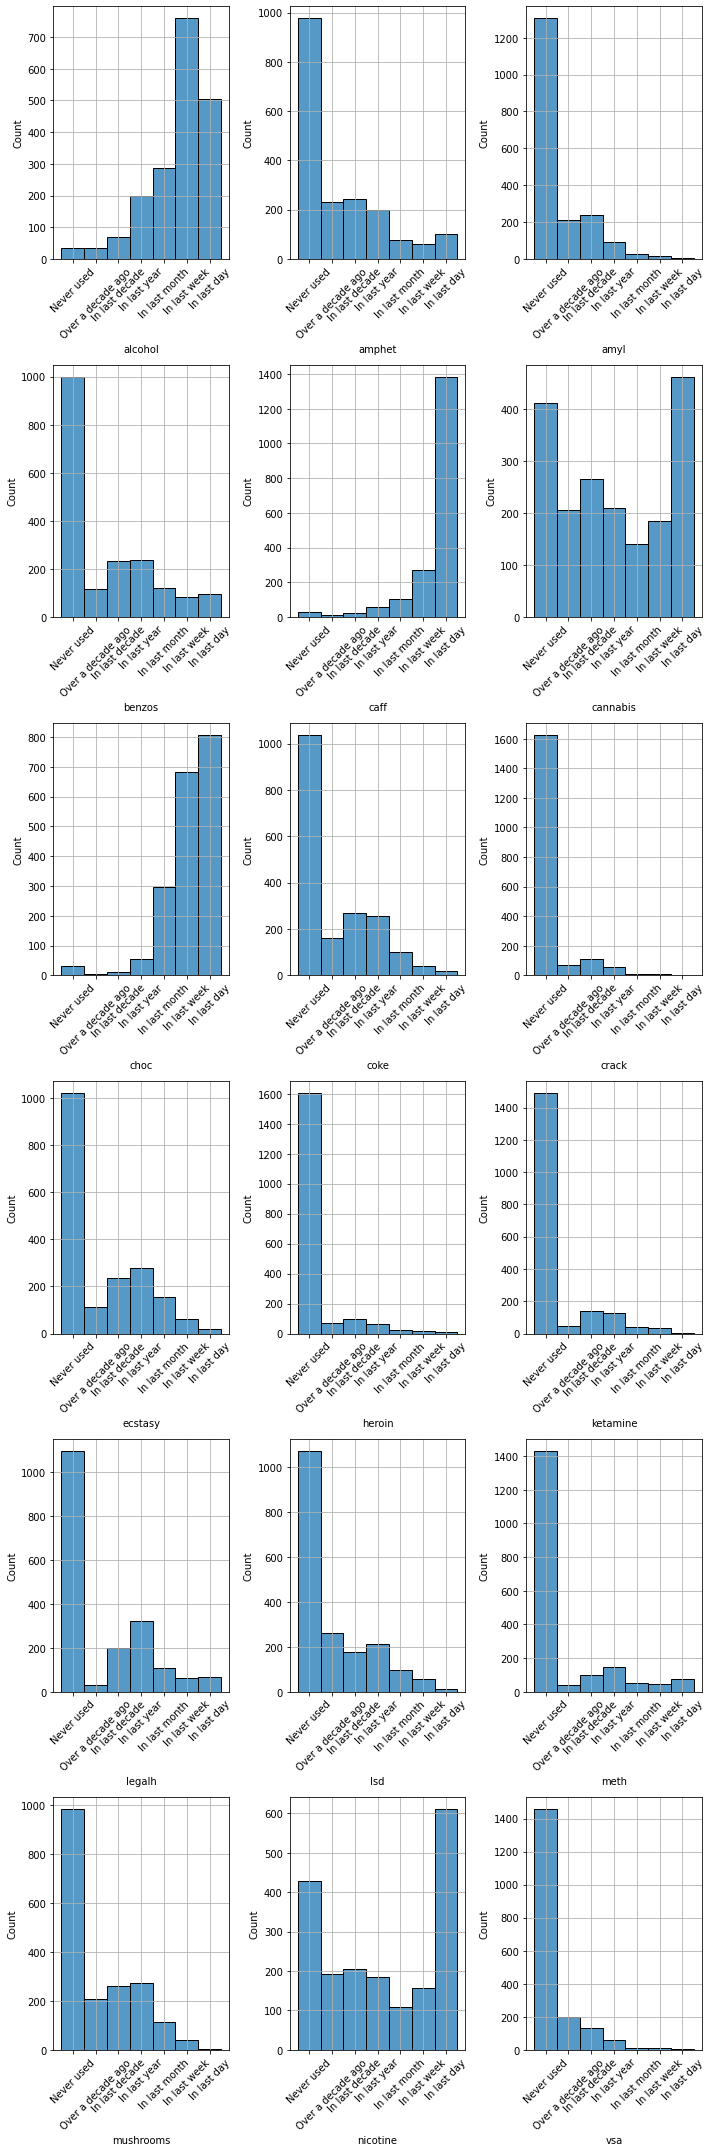

In [ ]:
# Drugs in the dataset
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos",  "Caff", "Cannabis", "Choc", "Coke",
       "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine",
       "Semer", "VSA"]
# Excluding the fake drug from the dataset
drugs = [drug.lower() for drug in drugs if drug != "Semer"]

# Mapping each tag to the represented drugs frequency usage
for drug in drugs: 
  tot.loc[tot[drug] == "CL0", drug] = "Never used"
  tot.loc[tot[drug] == "CL1", drug] = "Over a decade ago"
  tot.loc[tot[drug] == "CL2", drug] = "In last decade"
  tot.loc[tot[drug] == "CL3", drug] = "In last year"
  tot.loc[tot[drug] == "CL4", drug] = "In last month"
  tot.loc[tot[drug] == "CL5", drug] = "In last week"
  tot.loc[tot[drug] == "CL6", drug] = "In last day"

# Plotting usage counts for each drug
fig, ax = plt.subplots(6,3, figsize=(10, 30))
for i, drug in enumerate(drugs):
  # we need to define an order among cathegorical features in order to plot them accordingly
  tot[drug] = pd.Categorical(tot[drug], ["Never used", "Over a decade ago", "In last decade"
  , "In last year", "In last month", "In last week", "In last day"])
  sns.histplot(data = tot, x = drug, ax = ax[i//3, i%3])

  ax[i//3, i%3].grid()
  ax[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('Drugs distr.png', bbox_inches='tight')
plt.show()


In [ ]:
# Definining negative instances where the drug column is "Over a decade ago" or "Never used". Positive instances are the remaining
for drug in drugs:
  tot[drug] = tot[drug].astype(object) # Mapping back from cathegorical type to object: if this is not done it will not be possible to set to 0 and 1 the strings since these cathegories (0,1) were not defined 
  tot.loc[tot[drug] == "Never used", drug] = 0
  tot.loc[tot[drug] == "Over a decade ago", drug] = 0
  tot.loc[tot[drug] != 0, drug] = 1




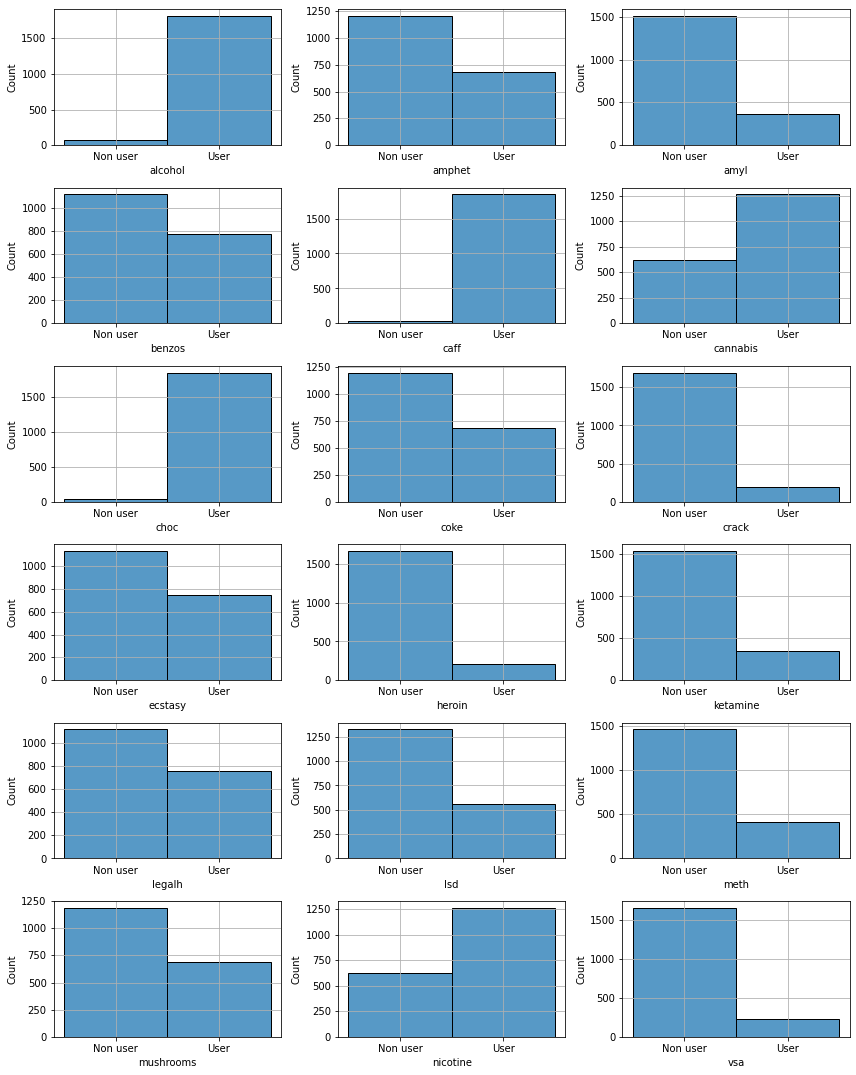

In [ ]:
# Plotting drugs distribution after that all the values have been mapped to 0 and 1
fig, ax = plt.subplots(6, 3, figsize=(12,15))
for i, drug in enumerate(drugs):
  sns.histplot(data = tot, x = drug, ax = ax[i//3, i%3], binwidth = 0.5)
  ax[i//3, i%3].grid()
  ax[i//3, i%3].set_xticks([0.25,0.75]) #center ticks in the middle of the bars
  ax[i//3, i%3].set_xticklabels(["Non user", "User"])
plt.tight_layout()
plt.savefig('Drug consumption binary.png', bbox_inches='tight')
plt.show()

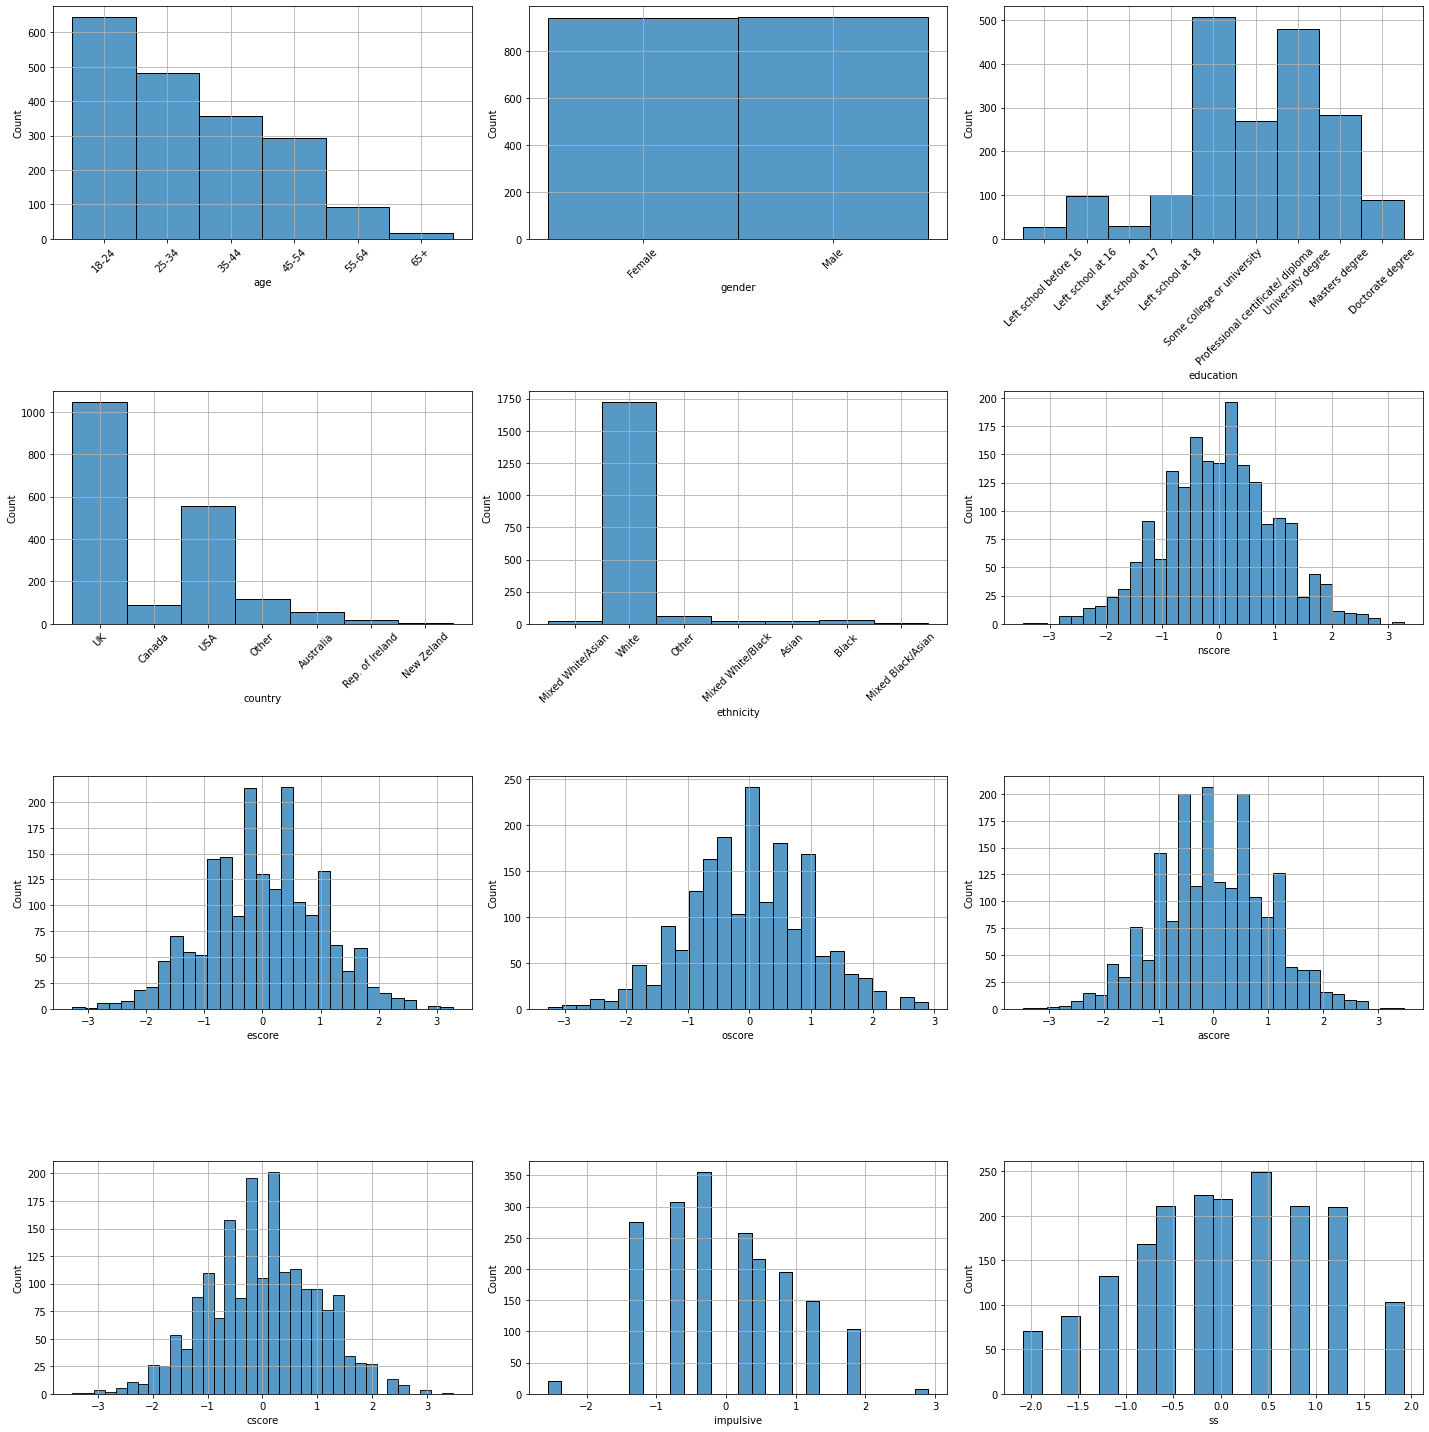

In [ ]:
# Remapping all the categorical attributes to the values they represent
attributes = ["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", 
       "Cscore", "Impulsive", "SS"]

attributes = [attribute.lower() for attribute in attributes]

tot.loc[tot["age"] == -0.95197, "age"] = "18-24"
tot.loc[tot["age"] == -0.07854, "age"] = "25-34"
tot.loc[tot["age"] ==  0.49788, "age"] = "35-44"
tot.loc[tot["age"] == 1.09449, "age"] = "45-54"
tot.loc[tot["age"] == 1.82213, "age"] = "55-64"
tot.loc[tot["age"] == 2.59171, "age"] = "65+"
tot["age"] = pd.Categorical(tot["age"], ["18-24","25-34","35-44","45-54","55-64", "65+"  ])


tot.loc[tot["gender"] == 0.48246, "gender"] = "Female"
tot.loc[tot["gender"] == -0.48246, "gender"] = "Male"


tot.loc[tot["education"] == -2.43591, "education"] = "Left school before 16"
tot.loc[tot["education"] == -1.73790, "education"] = "Left school at 16"
tot.loc[tot["education"] == -1.43719, "education"] = "Left school at 17"
tot.loc[tot["education"] == -1.22751, "education"] = "Left school at 18"
tot.loc[tot["education"] == -0.61113, "education"] = "Some college or university"
tot.loc[tot["education"] == -0.05921, "education"] = "Professional certificate/ diploma"
tot.loc[tot["education"] == 0.45468, "education"] = "University degree"
tot.loc[tot["education"] == 1.16365, "education"] = "Masters degree"
tot.loc[tot["education"] == 1.98437, "education"] = "Doctorate degree"
order = [ "Left school before 16","Left school at 16","Left school at 17","Left school at 18","Some college or university", "Professional certificate/ diploma",
         "University degree", "Masters degree", "Doctorate degree"]
tot["education"] = pd.Categorical(tot["education"], order)


tot.loc[tot["country"] == -0.09765, "country"] = "Australia"
tot.loc[tot["country"] == 0.24923, "country"] = "Canada"
tot.loc[tot["country"] == -0.46841, "country"] = "New Zeland"
tot.loc[tot["country"] == -0.28519, "country"] = "Other"
tot.loc[tot["country"] == 0.21128	, "country"] = "Rep. of Ireland"
tot.loc[tot["country"] == 0.96082, "country"] = "UK"
tot.loc[tot["country"] == -0.57009, "country"] = "USA"


tot.loc[tot["ethnicity"] == -0.50212, "ethnicity"] = "Asian"
tot.loc[tot["ethnicity"] == -1.10702, "ethnicity"] = "Black"
tot.loc[tot["ethnicity"] == 1.90725, "ethnicity"] = "Mixed Black/Asian"
tot.loc[tot["ethnicity"] == 0.12600, "ethnicity"] = "Mixed White/Asian"
tot.loc[tot["ethnicity"] == -0.22166, "ethnicity"] = "Mixed White/Black"
tot.loc[tot["ethnicity"] == 0.11440, "ethnicity"] = "Other"
tot.loc[tot["ethnicity"] == -0.31685, "ethnicity"] = "White"


# Plotting attributes distributions
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for i, attribute in enumerate(attributes):
  sns.histplot(data = tot, x = attribute, ax = ax[i//3, i%3])
  ax[i//3, i%3].grid()
  if i < 5:
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
  
  
plt.tight_layout()
plt.savefig('Features counts.png', bbox_inches='tight')
plt.show()

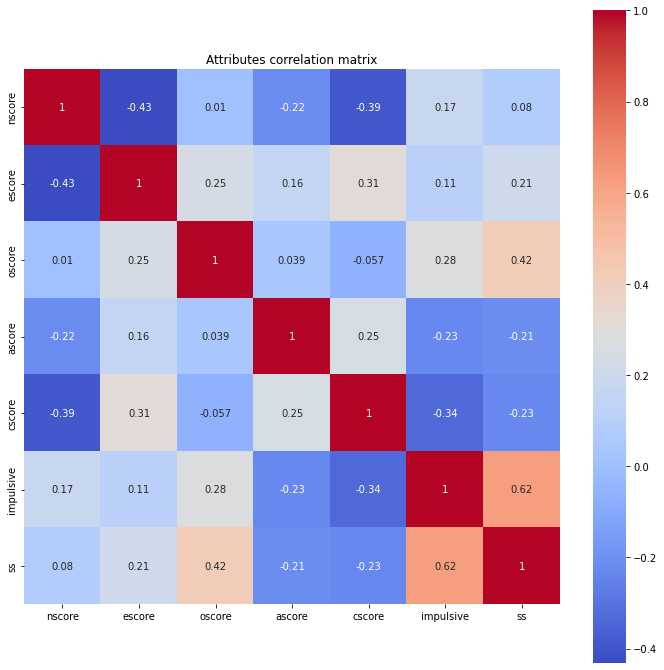

In [ ]:
numer_att = ["Nscore", "Escore", "Oscore", "Ascore", 
       "Cscore", "Impulsive", "SS"]
numer_att = [att.lower() for att in numer_att]

plt.figure(figsize=(12,12))
plt.title("Attributes correlation matrix")
sns.heatmap(tot[numer_att].corr(), annot=True, square=True, cmap='coolwarm')
plt.savefig('Features correlation.png', bbox_inches='tight')
plt.show()

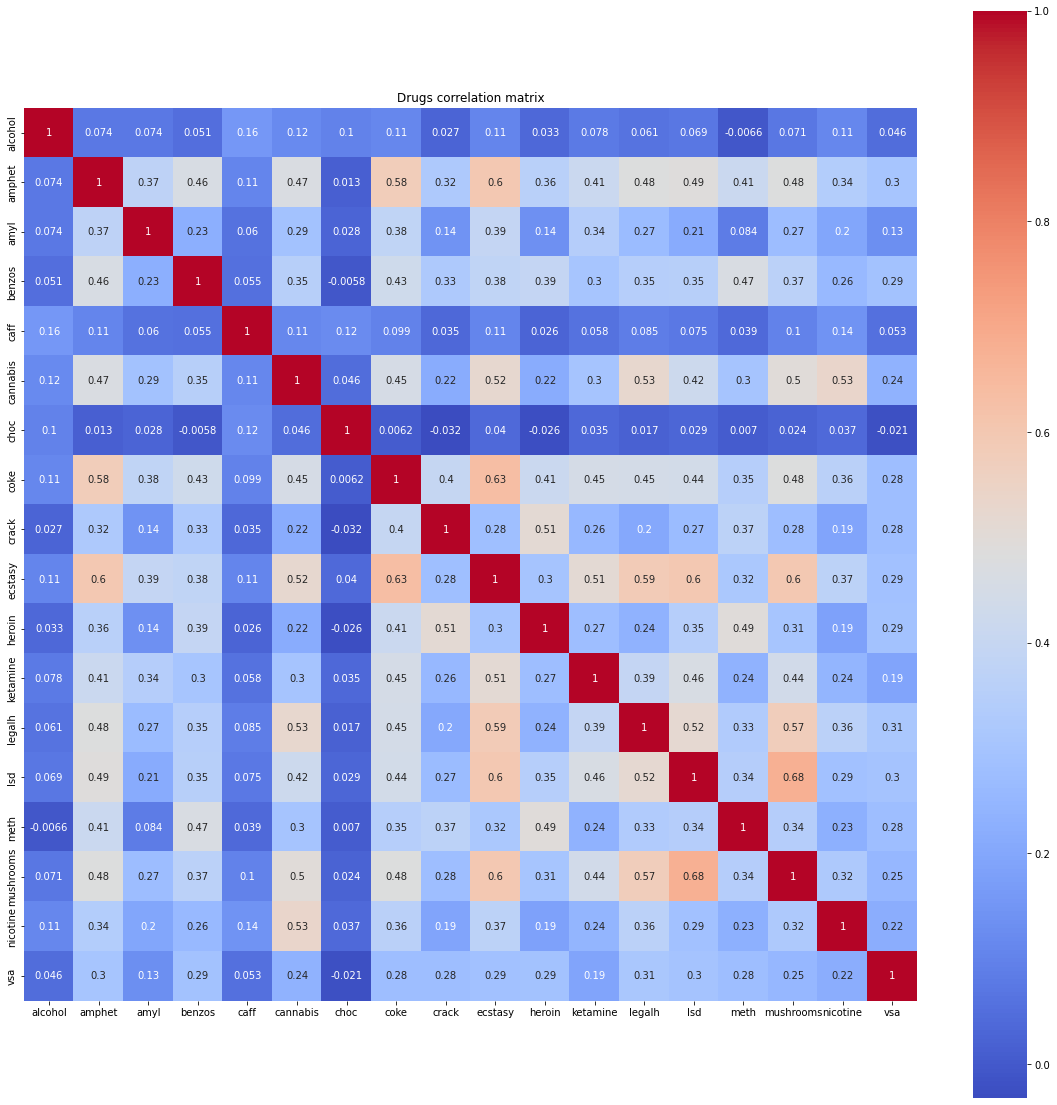

In [ ]:
tot[drugs] = tot[drugs].apply(pd.to_numeric)

# Plotting drugs correlation matrix
plt.figure(figsize=(20,20))
plt.title("Drugs correlation matrix")
sns.heatmap(tot[drugs].corr(), annot=True, square=True, cmap='coolwarm')
plt.savefig('Drugs counts.png', bbox_inches='tight')
plt.show()

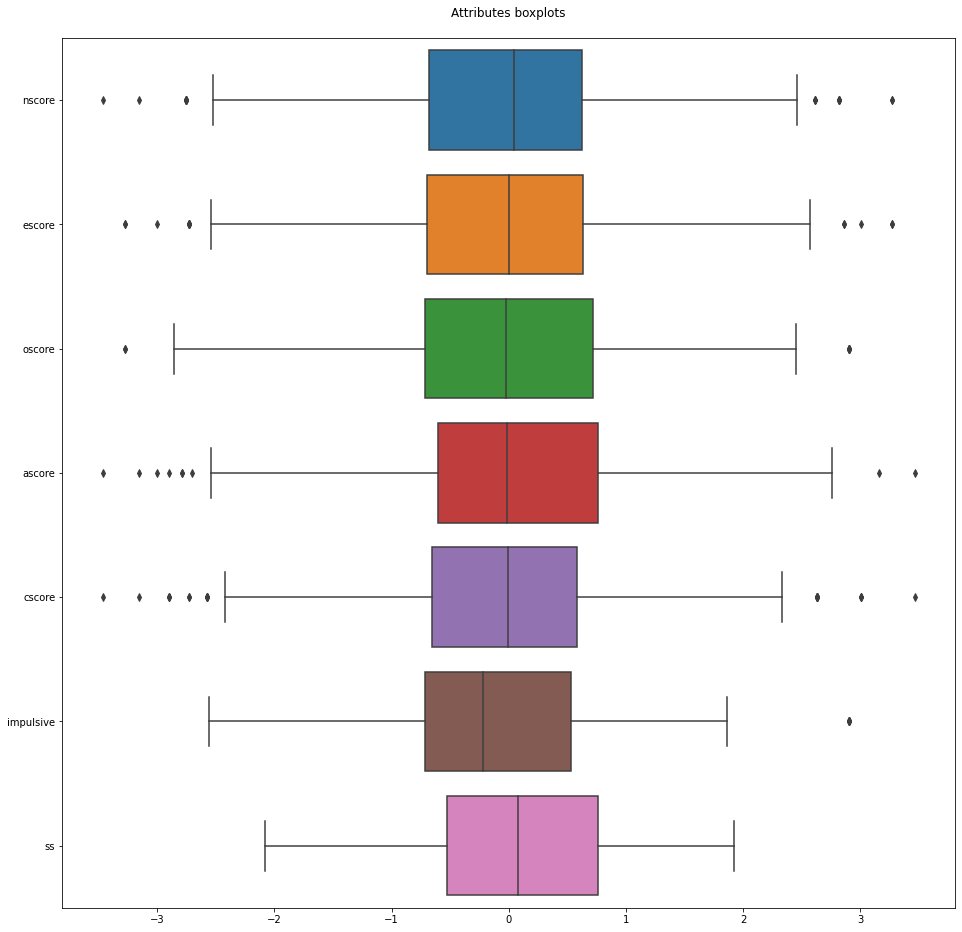

In [ ]:
plt.figure(figsize=(16, 16))
plt.title("Attributes boxplots\n")
sns.boxplot(data = tot[numer_att],orient = "h")
plt.savefig('Attributes boxplots.png', bbox_inches='tight')
plt.show()

# Target selection

In [ ]:
drug = "lsd"
# Ratio of positive instances and total of the samples
ratio = (tot[drug] == 1).sum()/tot.shape[0]
target = tot[drug].values
print("Positive/Total : ", ratio)

# X
dataset = tot[attributes]
# Stratified splitting of data-set with 80% of samples for training set
X_train, X_test, y_train, y_test = train_test_split(dataset, target,test_size=0.20, stratify=target, random_state=42)



Positive/Total :  0.29549071618037137


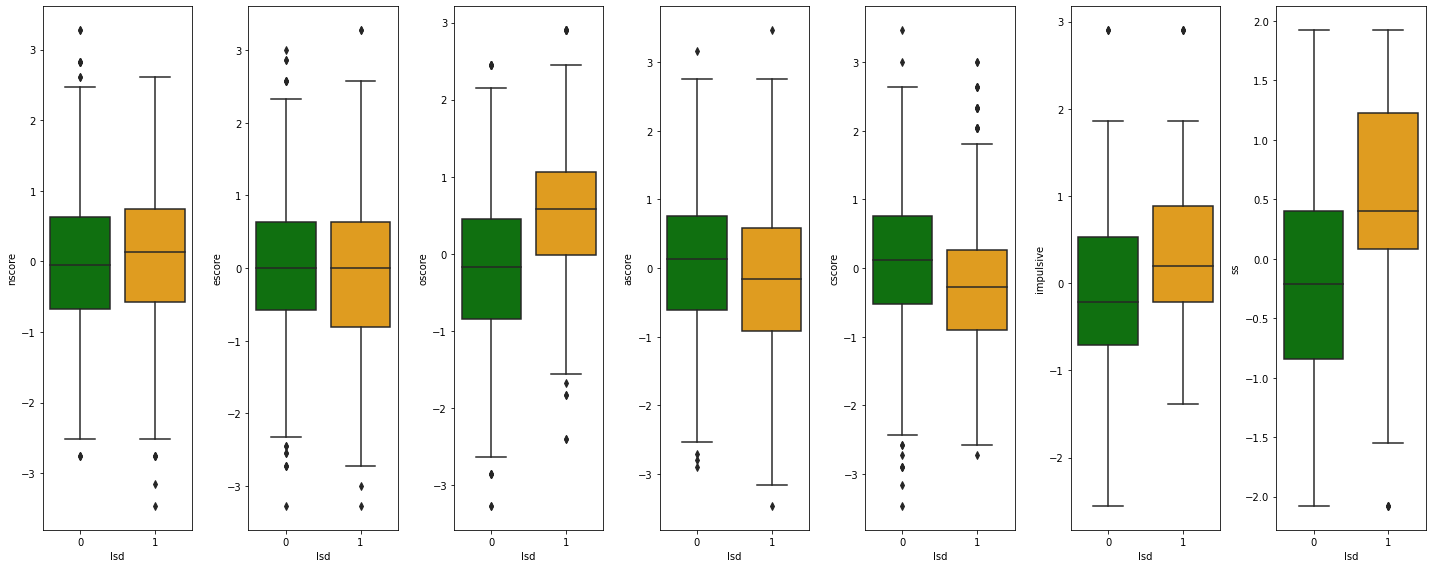

In [ ]:
# Plotting boxplots of numetrical attributes with respect to the labels
fig, ax = plt.subplots(1,7, figsize=(20, 8))
for i, attribute in enumerate(numer_att):
  sns.boxplot(x = drug, y = attribute,
             palette=["green", "orange"],
            data=tot, ax=ax[ i])
  ax[i].set_ylabel(attribute) 

plt.tight_layout()
plt.savefig('Boxplots.png', bbox_inches='tight')
plt.show()

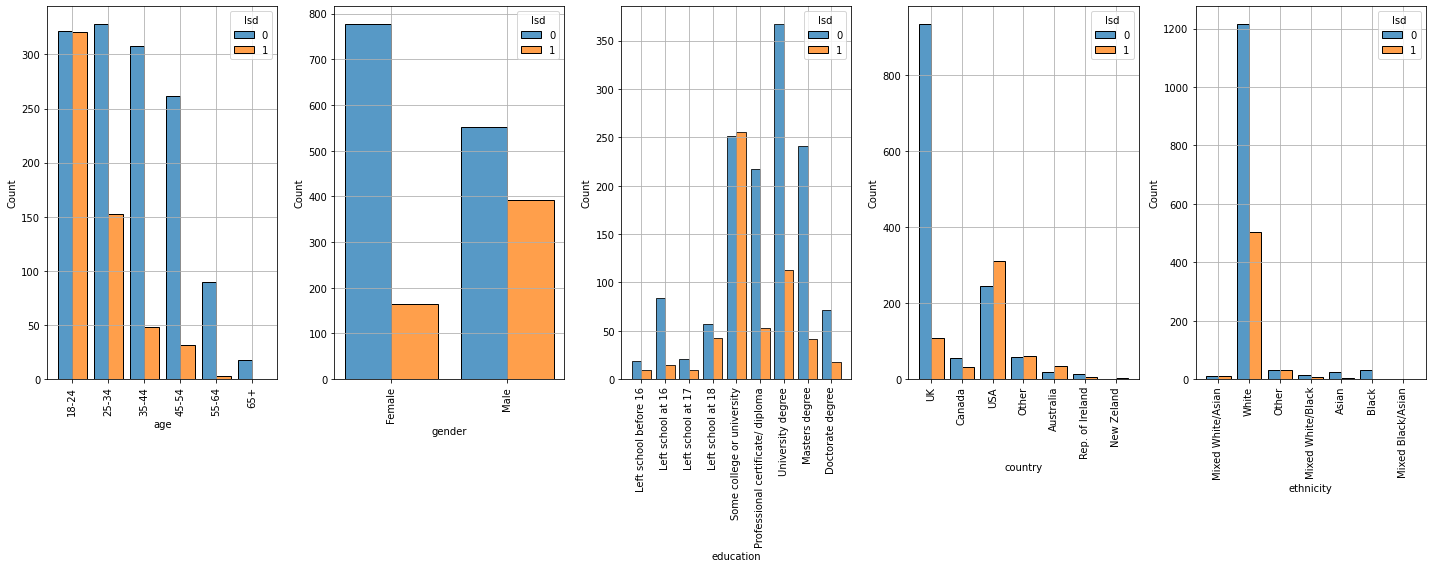

In [ ]:
# Plotting counts of categorical attributes with respect to the labels
nom_att = [attribute for attribute in attributes if attribute not in numer_att]
fig, ax = plt.subplots(1,5, figsize=(20, 8))
for i, attribute in enumerate(nom_att):
  sns.histplot(data=tot , x=attribute,  hue=drug , multiple="dodge", shrink=.8, ax=ax[i])
  ax[i].tick_params(axis='x', rotation=90)
  ax[i].grid()
plt.tight_layout()

plt.savefig('Counts per label.png', bbox_inches='tight')
plt.show()

# One-hot Encoding

In [ ]:
# One hot encoding of categorical attributes
enc = OneHotEncoder(sparse=False)
X_train_enc = enc.fit_transform(X_train[nom_att]) # fit only on training set
X_test_enc = enc.transform(X_test[nom_att])

# Final training and test set composed of numerical and categorical attributes
# concatanate them orizontally
X_train = np.hstack((X_train[numer_att], X_train_enc))
X_test = np.hstack((X_test[numer_att], X_test_enc))

# PCA insight

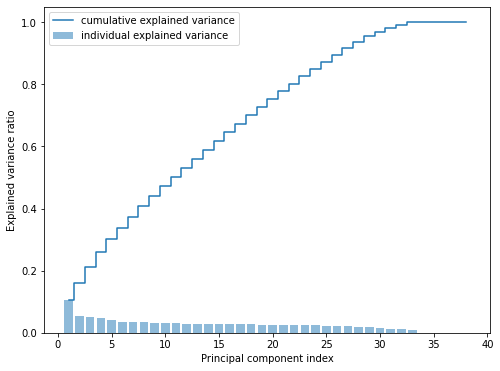

In [ ]:
# standardize training set
standardizer = StandardScaler()
X_train_standard = standardizer.fit_transform(X_train)

# compute variance-covariance matrix, then its eigenvalues and eigenvectors
cov_mat = np.cov(X_train_standard.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate cumulative sum of explained variances
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


# plot explained variances
plt.figure(figsize=(8, 6))
plt.bar(range(1,39), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,39), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.legend(loc='best')
plt.savefig('PCA.png', bbox_inches='tight')


# Functions definition

In [ ]:
def score_model(model, params, X_train, y_train, apply_pca = None, n_components = None, apply_fda = None):
   
    # stratified 5-fold cross validation
    cv = StratifiedKFold(n_splits=5)     
    scores = []
    # for each indexes set of training folds and validation fold of the 5 splits
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # select training and validation samples with masking
        X_train_fold, y_train_fold = X_train[train_fold_index], y_train[train_fold_index]
        X_val_fold, y_val_fold = X_train[val_fold_index], y_train[val_fold_index]

        # standardize
        standardizer = StandardScaler()
        X_train_fold = standardizer.fit_transform(X_train_fold) #fit only on training set
        X_val_fold = standardizer.transform(X_val_fold)

        if apply_pca and n_components != None:
          pca = PCA(n_components = n_components)
          X_train_fold = pca.fit_transform(X_train_fold) #fit only on training set
          X_val_fold = pca.transform(X_val_fold)


        if apply_fda:
          # we are not using LDA classifier, but projecting on the line where class result better separated
          fda = LinearDiscriminantAnalysis()
          X_train_fold = fda.fit_transform(X_train_fold, y_train_fold) #fit only on training set
          X_val_fold = fda.transform(X_val_fold)

        # apply resampling if we have that positive instances are less than 40% or more than 60% of the dataset
        if (y_train_fold == 1).sum()/y_train_fold.shape[0] < 0.4 or (y_train_fold == 1).sum()/y_train_fold.shape[0] > 0.6:
          if X_train.shape[0] == 38:
            # if we are using the original dataset do not interpolate on categorical attributes (one hot encoded)
            X_train_fold, y_train_fold = SMOTENC(categorical_features = list(range(12, 38)), random_state=42).fit_resample(X_train_fold, y_train_fold)
          else:
            X_train_fold, y_train_fold = SMOTE( random_state=42).fit_resample(X_train_fold, y_train_fold)

        # train the model
        trained_model = model(**params).fit(X_train_fold, y_train_fold)
        # validate the model with f1 
        score = f1_score(y_val_fold, trained_model.predict(X_val_fold)) 
        scores.append(score)

    # return obtained f1 scores
    return np.array(scores).mean()

In [ ]:
def test(model, best_conf, X_train, X_test, y_train, best_model = False, apply_pca = None, n_components = None, apply_fda = None):

  standardizer = StandardScaler()
  X_train = standardizer.fit_transform(X_train) #fit only on training set
  X_test = standardizer.transform(X_test)

  if apply_pca and n_components != None:
    pca = PCA(n_components = n_components)
    X_train = pca.fit_transform(X_train) #fit only on training set
    X_test = pca.transform(X_test)

    print(f"Total variance explained applying PCA with {n_components} components: {np.sum(pca.explained_variance_ratio_):.2f}")

  if apply_fda:
    # we are not using LDA classifier, but projecting on the line where class result better separated
    fda = LinearDiscriminantAnalysis()
    X_train = fda.fit_transform(X_train, y_train) #fit only on training set
    X_test = fda.transform(X_test)

  # apply resampling if we have that positive instances are less than 40% or more than 60% of the dataset
  if ratio < 0.4 or ratio > 0.6:
    if X_train.shape[0] == 38:
      # if we are using the original dataset do not interpolate on categorical attributes (one hot encoded)
      X_train_upsample, y_train_upsample = SMOTENC(categorical_features = list(range(12, 38)),random_state=42).fit_resample(X_train, y_train)
    else:
      X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_resample(X_train, y_train)

    # train the model with the best configuration of parameters found 
    clf = model(**best_conf).fit(X_train_upsample, y_train_upsample)
  else:
    clf = model(**best_conf).fit(X_train, y_train)

  # label testing set
  y_pred = clf.predict(X_test)
  # compute confusion matrix and metrics of interest
  confm = confusion_matrix(y_test, y_pred, labels = [0,1])
  accuracy = (confm[0,0] + confm[1,1])/confm.sum() #(TN+TP)/(TN+TP+FN+FP)
  precision = confm[1,1]/(confm[0,1] + confm[1,1]) # TP/(TP+FP)
  recall = confm[1,1]/(confm[1,0] + confm[1,1]) # TP/(TP+FN)
  f1 = 2*precision*recall/(precision+recall)


     
  # computing ROC curves for best model for each algorithm and plotting the confusion matrix
  if best_model:
    if model != SVC:
      # computing probabilities of belongig to each class
      y_probs = clf.predict_proba(X_test)
      # prob of belonging to class 1
      y_probs_positive = y_probs[:,1]

      false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probs_positive)
    else:
      # for SVM: computing signed distance from the halfspace
      y_dist = clf.decision_function(X_test)

      false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_dist)

    # plotting confusion matrix
    columns = ["Non user", "User"]
    plt.title('Confusion matrix')
    df_cm = pd.DataFrame(confm, index=columns, columns=columns, dtype= int)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    ax = sns.heatmap(df_cm, cmap='Blues', annot=True)
    plt.savefig('confm.png', bbox_inches='tight')

    return accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate



  return accuracy, precision, recall, f1

In [ ]:
def evaluate(model, params, X_train, X_test, y_train, 
             standardize = True, apply_pca = False, n_components = None, rm_outliers = None, apply_fda = False, best_model = False):
  
  # Outliers removal technique
  if rm_outliers != None:
    if rm_outliers == "forest": out = IsolationForest(random_state = 42)
    elif rm_outliers == "lof": out = LocalOutlierFactor(n_neighbors=10)
    elif rm_outliers == "svm": out = OneClassSVM(nu = 0.1)
    
    # 1 for inliers, -1 for outliers
    yhat = out.fit_predict(X_train)
    mask = yhat != -1
    print("Num samples before outlier removal: ", len(X_train))
    # removing outliers
    X_train, y_train = X_train[mask, :], y_train[mask]
    print("Num samples after outlier removal: ", len(X_train))
    len(X_train)



  scores = []
  configs = []
  # grid search on parameters to test
  for config in ParameterGrid(params):
      scores.append(score_model(model, config, X_train, y_train))
      configs.append(config)
  results = list(zip(configs, scores))
  results = np.array(results)
  # choosing configuration with max f1
  best_conf = results[results[:, 1].argmax(), 0]
  print("Best configuration: ", best_conf, "\n")

  if best_model:
    accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate = test(model, best_conf, X_train, X_test, y_train , best_model = best_model, apply_pca = apply_pca, n_components = n_components, apply_fda = apply_fda)
    return accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate 
  else:
    accuracy, precision, recall, f1 = test(model, best_conf, X_train, X_test, y_train, apply_pca = apply_pca, n_components = n_components, apply_fda = apply_fda)
    return accuracy, precision, recall, f1


In [ ]:
def plot_results(RESULTS, model_name):
  fontP = FontProperties()
  fontP.set_size('small')
  outlier_removal = ["No removal", "Forest", "LOF", "SVM"]

  fig, ax = plt.subplots(2, 2, figsize = (10,5), sharey = True)
  for i, metric in enumerate(RESULTS.keys()):
    X = np.array([2.0, 4, 6, 8]) - 0.8
    ax[i//2, i%2].set_title(metric)
    for pca in RESULTS[metric].keys():   
      ax[i//2, i%2].bar(X, RESULTS[metric][pca], width = 0.4, label = pca)
      X+= 0.4
    X = np.array([1.7, 3.7, 5.7, 7.7])
    ax[i//2, i%2].set_xticks(X)
    ax[i//2, i%2].set_xticklabels(outlier_removal)
    ax[i//2, i%2].set_xlabel("Removal technique")
    ax[i//2, i%2].grid()
  plt.legend(bbox_to_anchor=(1.04,1), title = "Transformation", prop = fontP)
  plt.tight_layout()
  plt.savefig(model_name +'.png', bbox_inches='tight')


# Models evaluation

## Decision tree

Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Total variance explained applying PCA with 8 components: 0.41
Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Total variance explained applying PCA with 18 components: 0.70
Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Total variance explained applying PCA with 8 components: 0.40
Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'criterion': 'entropy', 'max_depth': 4} 

Total variance explained applying PCA with 18 components: 0.70
Num samples before outlier removal:  1508
Num samples

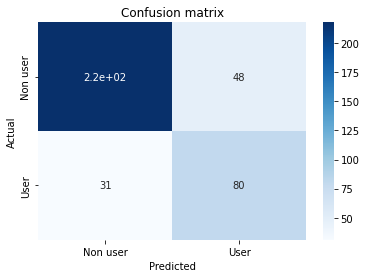

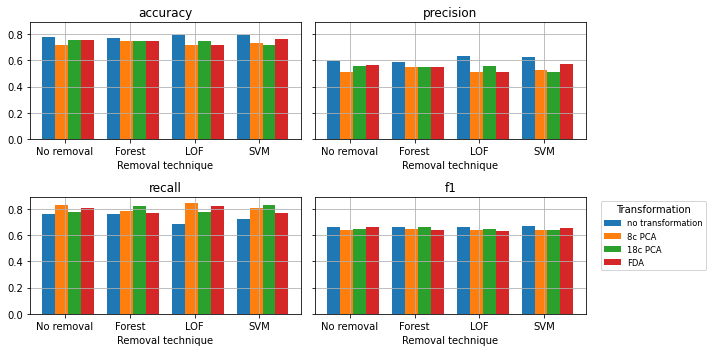

In [ ]:
# Decision Tree. f1: 0.67, svm, no transformation
CONFM, FPR, TPR = [], [], []
# fixing random state so that if rerunning the cell we obtain the same results
np.random.seed(42)
RESULTS = {
    "accuracy": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "precision": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "recall": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "f1": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    }

model = DecisionTreeClassifier
params = {
    'max_depth': [None, 4, 6, 10, 12, 14], 
    "criterion" : ["gini", "entropy"],
}
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test, y_train, apply_pca = False, n_components = None)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test, y_train, standardize = True, apply_pca = True, n_components = 8)
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18)
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)


accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None)
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



model = DecisionTreeClassifier
params = {
    'max_depth': [None, 4, 6, 10, 12, 14], 
    "criterion" : ["gini", "entropy"],
}
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "forest")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "forest")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "lof")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "lof")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)


accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = DecisionTreeClassifier
accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "svm", best_model=True)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)

CONFM.append(confm)
FPR.append(false_positive_rate)
TPR.append(true_positive_rate)
# renaming the confusion matrix image
!mv confm.png tree_confm.png







model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "svm")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = DecisionTreeClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "svm")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


plot_results(RESULTS, "Decision Tree")
print(RESULTS)

## SVM

Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Total variance explained applying PCA with 8 components: 0.41
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Total variance explained applying PCA with 18 components: 0.70
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Total variance explained applying PCA with 8 components: 0.40
Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Total variance explained applying PCA with 18 components: 0.70
Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'C': 0.5, 'kernel': 'rbf'} 

Num sample

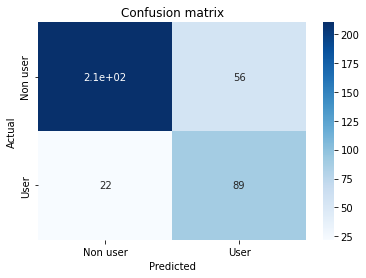

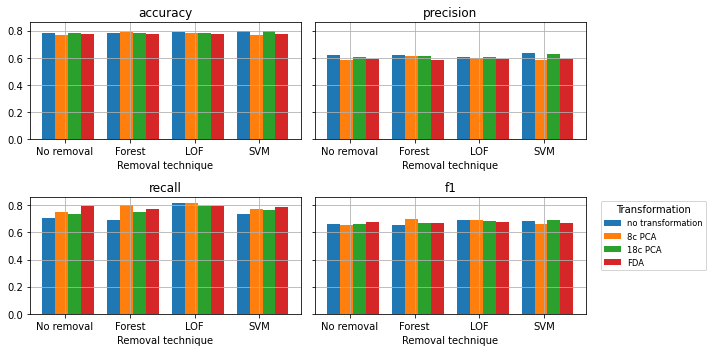

In [ ]:
#SVM. f1: 0.70, forest, 8c PCA
np.random.seed(42)
RESULTS = {
    "accuracy": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "precision": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "recall": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "f1": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    }
model = SVC
params = {
    "kernel" : {"linear", "poly", "rbf"},
    "C" : {0.5, 1, 1.5, 2}
}
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8)
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18)
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model=SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None)
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = SVC
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = SVC
accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "forest", best_model=True)
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)

CONFM.append(confm)
FPR.append(false_positive_rate)
TPR.append(true_positive_rate)
!mv confm.png svm_confm.png




model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "forest")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "lof")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = SVC
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "lof")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "svm")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





 
model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "svm")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = SVC
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



plot_results(RESULTS, "Svc")
print(RESULTS)

## Random Forest

Best configuration:  {'max_depth': 6, 'n_estimators': 100} 

Best configuration:  {'max_depth': 10, 'n_estimators': 50} 

Total variance explained applying PCA with 8 components: 0.40
Best configuration:  {'max_depth': 6, 'n_estimators': 200} 

Total variance explained applying PCA with 18 components: 0.70
Best configuration:  {'max_depth': 10, 'n_estimators': 100} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'max_depth': 6, 'n_estimators': 100} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'max_depth': 10, 'n_estimators': 50} 

Total variance explained applying PCA with 8 components: 0.41
Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'max_depth': 6, 'n_estimators': 50} 

Total variance explained applying PCA with 18 components: 0.69
Num samples before outlier removal:  1508
Num samples after outlier remova

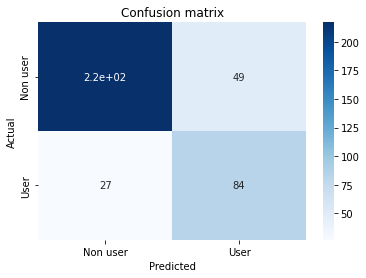

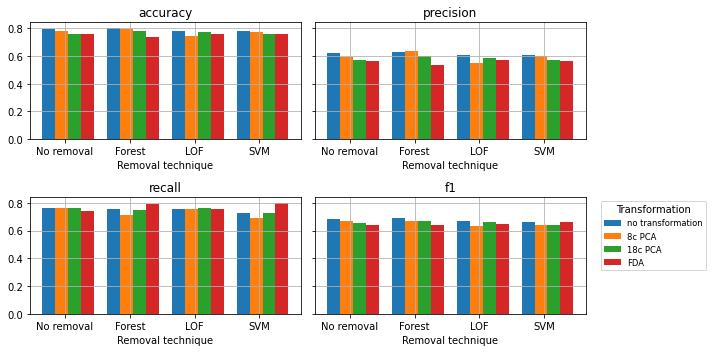

In [ ]:
#0.69, no transformation, forest
np.random.seed(42)
RESULTS = {
    "accuracy": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "precision": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "recall": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "f1": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    }
    
model = RandomForestClassifier
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 10, 12, 14],
}
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)







model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8)
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = RandomForestClassifier
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18)
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None)
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



model = RandomForestClassifier
accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "forest", best_model = True)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)

CONFM.append(confm)
FPR.append(false_positive_rate)
TPR.append(true_positive_rate)
!mv confm.png forest_confm.png



model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "forest")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "forest")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = RandomForestClassifier
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "lof")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "lof")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "svm")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)


 
model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "svm")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = RandomForestClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



plot_results(RESULTS, "Random Forest")
print(RESULTS)

## KNN

Best configuration:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} 

Best configuration:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} 

Total variance explained applying PCA with 8 components: 0.41
Best configuration:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} 

Total variance explained applying PCA with 18 components: 0.70
Best configuration:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'} 

Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'} 

Total variance explained applying PCA with 8 components: 0.41
Num samples before outlier removal:  1508
Num samples after outlier removal:  1422
Best configuration:  {'metric'

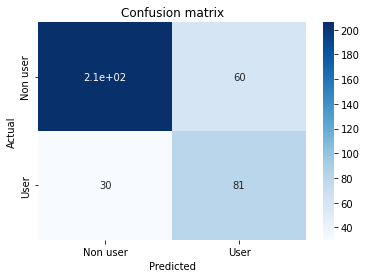

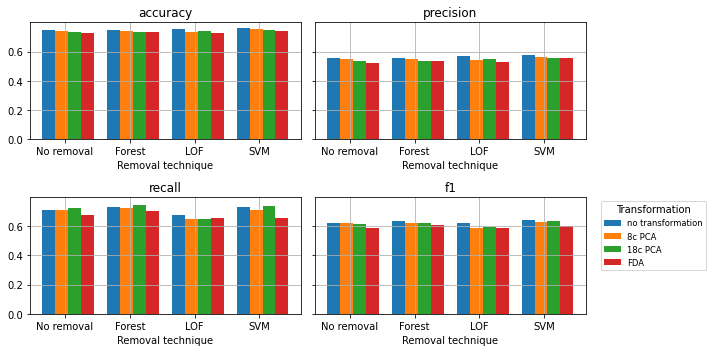

In [ ]:
# KNN. f1: 0.64, svm, no transformation
np.random.seed(42)
RESULTS = {
    "accuracy": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "precision": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "recall": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    "f1": {"no transformation": [], "8c PCA" : [], "18c PCA": [], "FDA": []}, 
    }
    
    
model = KNeighborsClassifier
params = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 40],
    'weights': ["uniform", "distance"],
    'metric' : ["euclidean", "manhattan"] }
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8)
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18)
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None)
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



model = KNeighborsClassifier
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = KNeighborsClassifier
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "forest")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)





model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "forest")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "forest")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)


model = KNeighborsClassifier
accuracy, precision, recall, f1  = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)




model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "lof")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)




model = KNeighborsClassifier
accuracy, precision, recall, f1= evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "lof")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)



model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "lof")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)

model = KNeighborsClassifier
accuracy, precision, recall, f1, confm, false_positive_rate, true_positive_rate = evaluate(model, params, X_train, X_test,  y_train, apply_pca = False, n_components = None, rm_outliers = "svm", best_model=True)
RESULTS["accuracy"]["no transformation"].append(accuracy)
RESULTS["precision"]["no transformation"].append(precision)
RESULTS["recall"]["no transformation"].append(recall)
RESULTS["f1"]["no transformation"].append(f1)

CONFM.append(confm)
FPR.append(false_positive_rate)
TPR.append(true_positive_rate)
!mv confm.png KNN_confm.png


model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 8, rm_outliers = "svm")
RESULTS["accuracy"]["8c PCA"].append(accuracy)
RESULTS["precision"]["8c PCA"].append(precision)
RESULTS["recall"]["8c PCA"].append(recall)
RESULTS["f1"]["8c PCA"].append(f1)



 
model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, standardize = True, apply_pca = True, n_components = 18, rm_outliers = "svm")
RESULTS["accuracy"]["18c PCA"].append(accuracy)
RESULTS["precision"]["18c PCA"].append(precision)
RESULTS["recall"]["18c PCA"].append(recall)
RESULTS["f1"]["18c PCA"].append(f1)

model = KNeighborsClassifier
accuracy, precision, recall, f1 = evaluate(model, params, X_train, X_test,  y_train, apply_fda = True, n_components = None, rm_outliers = "svm")
RESULTS["accuracy"]["FDA"].append(accuracy)
RESULTS["precision"]["FDA"].append(precision)
RESULTS["recall"]["FDA"].append(recall)
RESULTS["f1"]["FDA"].append(f1)



plot_results(RESULTS, "KNN")
print(RESULTS)

#ROC curves

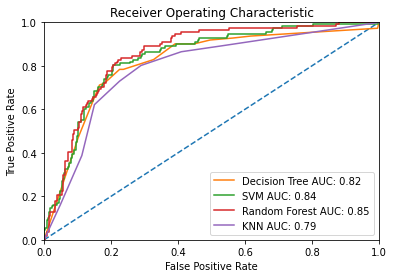

In [ ]:
# Plotting ROC curves
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
for false_positive_rate, true_positive_rate, name in zip(FPR, TPR, ["Decision Tree", "SVM", "Random Forest", "KNN"]):
  roc_auc = auc(false_positive_rate, true_positive_rate)
  plt.plot(false_positive_rate, true_positive_rate, label = "{} AUC: {:.2}".format(name, roc_auc))


plt.legend()
plt.savefig('ROC.png', bbox_inches='tight')